# **PROJECT BY:**
# **Abdul Hadi Durrani (21L-5630)**
# **Nawall Aamer       (21L-5620)**
# **Abdullah Awan      (21L-5663)**
# **Soha Bilal         (21L-6258)**

# **Loading Dataset**

In [2]:
import pandas as pd

nasa_df = pd.read_csv("nasa.csv")

nasa_df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


# **Data preprocessing**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

categorical_cols = ['Orbiting Body', 'Equinox']
numerical_cols = nasa_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

X = nasa_df.drop(columns=["Hazardous"])
y = nasa_df["Hazardous"]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed_df = pd.DataFrame(X_preprocessed)

X_preprocessed_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.693150,-0.460071,-0.818540,-2.203207,0.277694,0.476904,-1.811763,2.189444,0.303156,-0.196594,...,1.022599e-11,-3.378714e-13,-1.006563e-13,7.720658e-15,-2.593471e-14,4.783212e-15,4.374844e-14,9.954236e-18,1.0,1.0
1,0.304192,-2.071261,-1.829049,-0.196947,0.404273,0.337610,1.171755,-0.631356,0.691116,0.603633,...,-1.829608e-11,4.908570e-12,-9.057607e-14,4.231214e-14,2.242273e-14,-6.846370e-15,5.272836e-19,-6.257004e-16,1.0,1.0
2,0.014228,1.446778,2.663526,-0.200534,-2.103022,-2.365363,-0.096232,0.640978,0.814891,0.575091,...,1.871376e-11,-4.683762e-12,6.873354e-14,3.874769e-14,2.680840e-14,2.795974e-15,-1.959514e-17,7.598006e-16,1.0,1.0
3,-2.039890,-0.718712,0.097973,-0.972221,0.321273,-0.321015,-0.570008,0.124615,-1.568313,-1.659214,...,-4.369832e-12,-5.500569e-13,-1.983869e-14,-1.697284e-14,2.220176e-14,-3.241352e-15,3.616913e-17,-1.948072e-17,1.0,1.0
4,-0.312831,-1.517848,-0.703017,-2.091346,0.488106,-0.302666,-0.146914,-0.235401,-0.663667,-0.424785,...,1.741268e-11,2.129981e-12,-1.001062e-13,4.181049e-15,-1.870041e-14,-4.101530e-15,-1.260859e-16,9.324523e-17,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,-2.031572,0.215928,0.212732,3.318531,-0.564378,1.393057,2.783288,-0.015328,0.303055,1.401427,...,-3.131991e-11,1.339130e-12,-3.450563e-14,-4.378963e-14,-3.520950e-15,1.247338e-15,-3.380107e-17,-8.640783e-16,1.0,1.0
4683,-4.283857,0.678643,3.652293,-0.557598,-0.674665,1.371107,0.700730,2.121554,0.250902,-0.239718,...,3.591865e-11,-2.273873e-12,-1.188411e-13,3.067314e-14,-4.156971e-15,-3.212910e-16,-8.584445e-17,3.861818e-16,1.0,1.0
4684,-2.485151,2.260153,1.579458,-0.176985,-0.861469,1.025309,0.441163,-1.366754,-0.654154,0.894865,...,-2.152174e-11,3.756179e-12,1.744481e-14,-4.158475e-14,-2.773251e-14,-2.013854e-15,4.658043e-17,4.720115e-16,1.0,1.0
4685,-1.115323,0.796923,-0.535635,-1.670979,0.217072,1.101708,1.887658,0.037927,-0.031510,0.367793,...,-1.886211e-11,4.719213e-13,5.281952e-14,-3.642627e-14,3.773770e-14,-1.197152e-15,6.307971e-17,5.661716e-16,1.0,1.0


# **Feature Extraction Method (Recursive Feature Elimination)**

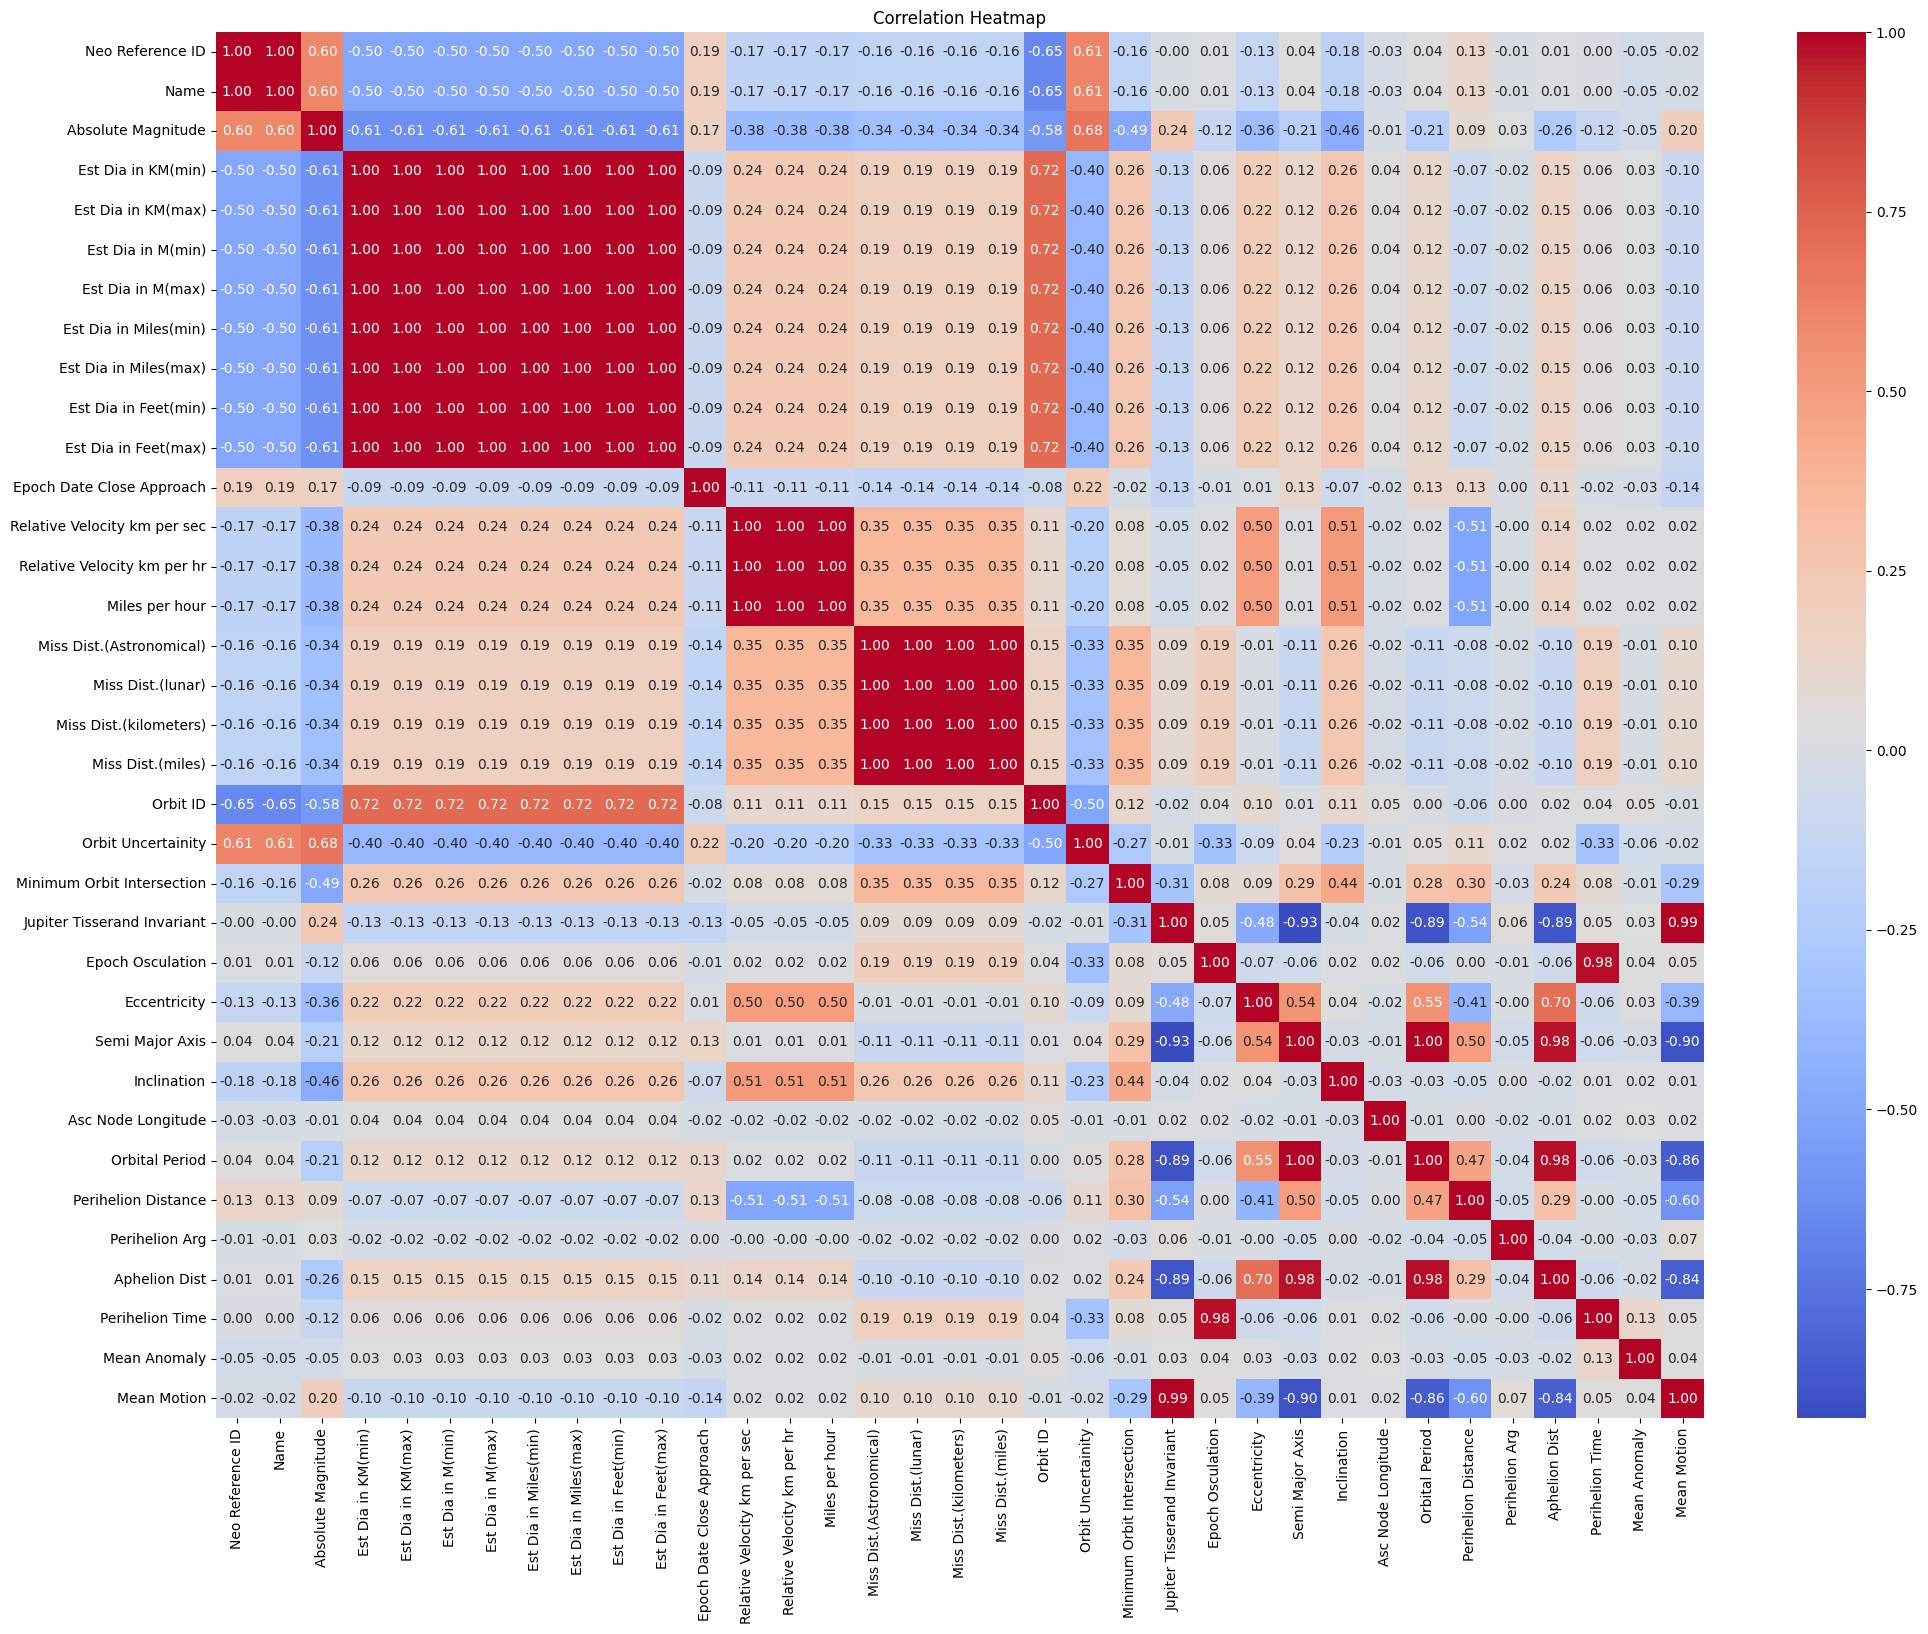

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = nasa_df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

numeric_df = nasa_df.select_dtypes(include=['number'])

X_numeric = numeric_df
y_numeric = nasa_df["Hazardous"]

# Initializing model for RFE
model = RandomForestClassifier()

# Initializing RFE
rfe = RFE(model, n_features_to_select=10)

rfe.fit(X_numeric, y_numeric)

selected_features = X_numeric.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
       'Est Dia in Feet(max)', 'Minimum Orbit Intersection', 'Inclination',
       'Perihelion Distance'],
      dtype='object')


# **Wrapper Method (Forward Feature Selection)**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# Drop non-numeric columns and columns that are not relevant for feature selection
X_numeric = nasa_df.drop(columns=['Neo Reference ID', 'Name', 'Close Approach Date', 'Orbit Determination Date', 'Equinox', 'Hazardous'])

X_encoded = pd.get_dummies(X_numeric)  

y = nasa_df['Hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform forward feature selection
selector = SequentialFeatureSelector(clf,
                                     n_features_to_select=10,  # Number of features to select
                                     direction='forward',  # Forward selection
                                     scoring='accuracy',
                                     cv=5)

# Fit the selector to the training data
selector = selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

# **Data Visualization**

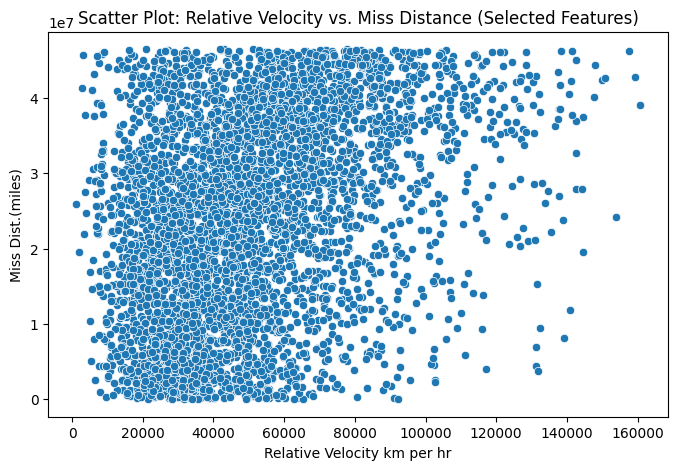

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Relative Velocity vs. Miss Distance (Miles) using selected features
selected_features = ['Relative Velocity km per hr', 'Miss Dist.(miles)']
selected_df = nasa_df[selected_features]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=selected_df.columns[0], y=selected_df.columns[1], data=selected_df)
plt.title('Scatter Plot: Relative Velocity vs. Miss Distance (Selected Features)')
plt.xlabel(selected_df.columns[0])
plt.ylabel(selected_df.columns[1])
plt.show()

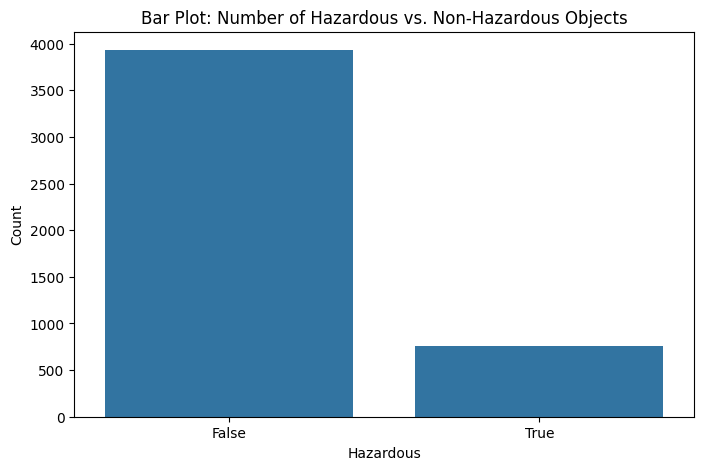

In [ ]:
# Bar Plot: Number of hazardous vs. non-hazardous objects
plt.figure(figsize=(8, 5))
sns.countplot(x='Hazardous', data=nasa_df)
plt.title('Bar Plot: Number of Hazardous vs. Non-Hazardous Objects')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

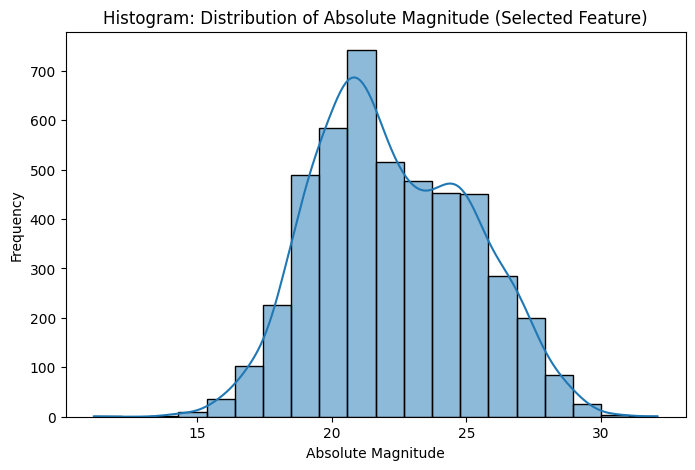

In [ ]:
# Histogram: Distribution of Absolute Magnitude using selected feature
selected_feature = 'Absolute Magnitude'

plt.figure(figsize=(8, 5))
sns.histplot(x=selected_feature, data=nasa_df, bins=20, kde=True)
plt.title('Histogram: Distribution of Absolute Magnitude (Selected Feature)')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.show()

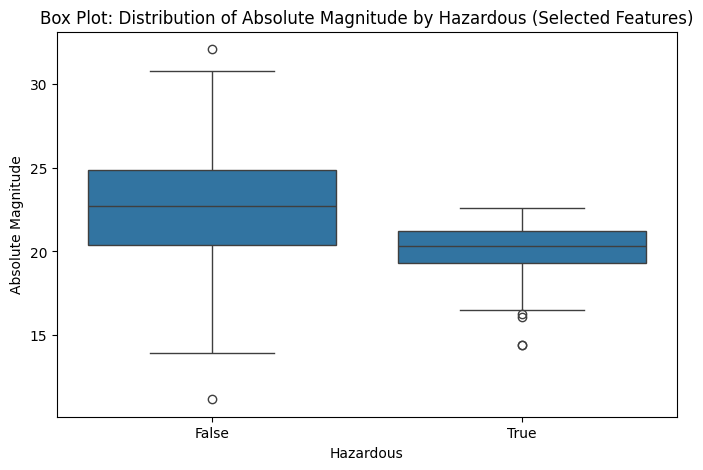

In [ ]:
# Box Plot: Distribution of Absolute Magnitude by Hazardous using selected features
selected_features = ['Hazardous', 'Absolute Magnitude']
selected_df = nasa_df[selected_features]

plt.figure(figsize=(8, 5))
sns.boxplot(x=selected_df.columns[0], y=selected_df.columns[1], data=selected_df)
plt.title('Box Plot: Distribution of Absolute Magnitude by Hazardous (Selected Features)')
plt.xlabel(selected_df.columns[0])
plt.ylabel(selected_df.columns[1])
plt.show()

# **Checking for class imbalance**

In [ ]:
# Checking class distribution
class_distribution = nasa_df['Hazardous'].value_counts()
print("Class Distribution:\n", class_distribution)

# Calculating the imbalance ratio
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("\nImbalance Ratio:", imbalance_ratio)

Class Distribution:
 Hazardous
False    3932
True      755
Name: count, dtype: int64

Imbalance Ratio: 5.207947019867549


In [4]:
from imblearn.over_sampling import RandomOverSampler

# Creating an oversampler object
oversampler = RandomOverSampler(random_state=42)

# Resampling the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Checking the class distribution after oversampling
class_distribution_resampled = pd.Series(y_resampled).value_counts()
print("Class Distribution after Oversampling:\n", class_distribution_resampled)

# Calculating the imbalance ratio after oversampling
imbalance_ratio_resampled = class_distribution_resampled[0] / class_distribution_resampled[1]
print("\nImbalance Ratio after Oversampling:", imbalance_ratio_resampled)

ModuleNotFoundError: No module named 'imblearn'

# **Different Models.**

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selected_features)
    ])

# Defining models
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Evaluating each model using cross-validation
for model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipe, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}, Std = {scores.std()}")

LogisticRegression: Mean Accuracy = 0.9436695735446602, Std = 0.009408168310456736
DecisionTreeClassifier: Mean Accuracy = 0.9986013986013986, Std = 0.0008433883764412952
RandomForestClassifier: Mean Accuracy = 0.9980928162746345, Std = 0.0014496826765405294
SVC: Mean Accuracy = 0.970627833882518, Std = 0.009300517273486929
KNeighborsClassifier: Mean Accuracy = 0.9716441897219135, Std = 0.008747323560930498
GaussianNB: Mean Accuracy = 0.9347662284511695, Std = 0.014285847075904249
AdaBoostClassifier: Mean Accuracy = 0.9974570883661793, Std = 0.0017525808966420877
GradientBoostingClassifier: Mean Accuracy = 0.9975841530664571, Std = 0.001944879388280097


# **Cross-validation and grid search CV**

In [67]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for each model with different hyperparameters
param_grid = {
    LogisticRegression.__name__.lower(): {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    DecisionTreeClassifier.__name__.lower(): {
        'classifier__max_depth': [None, 5, 10, 15, 20],
    },
    RandomForestClassifier.__name__.lower(): {
        'classifier__n_estimators': [100, 200, 300],
    },
    SVC.__name__.lower(): {
        'classifier__C': [0.1, 1, 10],
    },
    KNeighborsClassifier.__name__.lower(): {
        'classifier__n_neighbors': [3, 5, 7],
    },
    GaussianNB.__name__.lower(): {},
    AdaBoostClassifier.__name__.lower(): {
        'classifier__n_estimators': [50, 100, 200],
    },
    GradientBoostingClassifier.__name__.lower(): {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.5]
    }
}

# Defining grid search for each model
grid_searches = []
for model in models:
    model_name_lower = model.__class__.__name__.lower()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipe, param_grid=param_grid[model_name_lower], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    grid_searches.append(grid_search)

for i, grid_search in enumerate(grid_searches):
    model_name = models[i].__class__.__name__
    print(f"{model_name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LogisticRegression: Best Parameters - {'classifier__C': 0.1}, Best Score - 0.946849021901069
DecisionTreeClassifier: Best Parameters - {'classifier__max_depth': 10}, Best Score - 0.9986013986013986
RandomForestClassifier: Best Parameters - {'classifier__n_estimators': 200}, Best Score - 0.9980928162746345
SVC: Best Parameters - {'classifier__C': 10}, Best Score - 0.9857589669178843
KNeighborsClassifier: Best Parameters - {'classifier__n_neighbors': 3}, Best Score - 0.9806722539546966
GaussianNB: Best Parameters - {}, Best Score - 0.9347662284511695
AdaBoostClassifier: Best Parameters - {'classifier__n_estimators': 200}, Best Score - 0.9980928162746345
GradientBoostingClassifier: Best Parameters - {'classifier__learning_rate': 0.5, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}, Best Score - 0.9989828353464716


# **Accuracy measures**

In [68]:
from sklearn.metrics import classification_report

for i, grid_search in enumerate(grid_searches):
    model_name = models[i].__class__.__name__
    y_pred = grid_search.predict(X_resampled)
    print(f"{model_name}:")
    print(classification_report(y_resampled, y_pred))

LogisticRegression:
              precision    recall  f1-score   support

       False       0.98      0.92      0.95      3932
        True       0.92      0.98      0.95      3932

    accuracy                           0.95      7864
   macro avg       0.95      0.95      0.95      7864
weighted avg       0.95      0.95      0.95      7864

DecisionTreeClassifier:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3932
        True       1.00      1.00      1.00      3932

    accuracy                           1.00      7864
   macro avg       1.00      1.00      1.00      7864
weighted avg       1.00      1.00      1.00      7864

RandomForestClassifier:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3932
        True       1.00      1.00      1.00      3932

    accuracy                           1.00      7864
   macro avg       1.00      1.00      1.00      7864
weight

# **Explainable AI models**

In [15]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e76bc476f51195465ebf3ee7f06e09be029fccd1ad50ec3e419c8920210e69a2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

nasa_df = pd.read_csv("nasa.csv")

X = nasa_df.drop(columns=["Hazardous"])
y = nasa_df["Hazardous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object']).columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(onehot_encoder.transform(X_test[categorical_cols]))

# Reindexing encoded dataframes to match original indices
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

# Concatenating encoded features with numeric features
X_train_processed = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_processed, y_train)

# Initializing LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_processed.values, mode="classification", feature_names=X_train_processed.columns.tolist())

observation_idx = 0  # Index of the observation we want to explain
exp = explainer.explain_instance(X_test_processed.values[observation_idx], rf_classifier.predict_proba, num_features=5)

print(exp.as_list())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('0.01 < Minimum Orbit Intersection <= 0.05', 0.11213247465935013), ('0.25 < Est Dia in KM(max) <= 0.54', 0.04099855564509208), ('0.07 < Est Dia in Miles(min) <= 0.15', 0.04020411861987111), ('0.15 < Est Dia in Miles(max) <= 0.34', 0.039458914495933924), ('110.80 < Est Dia in M(min) <= 242.41', 0.032648903627136266)]


In [17]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.8 MB/s eta 0:00:00


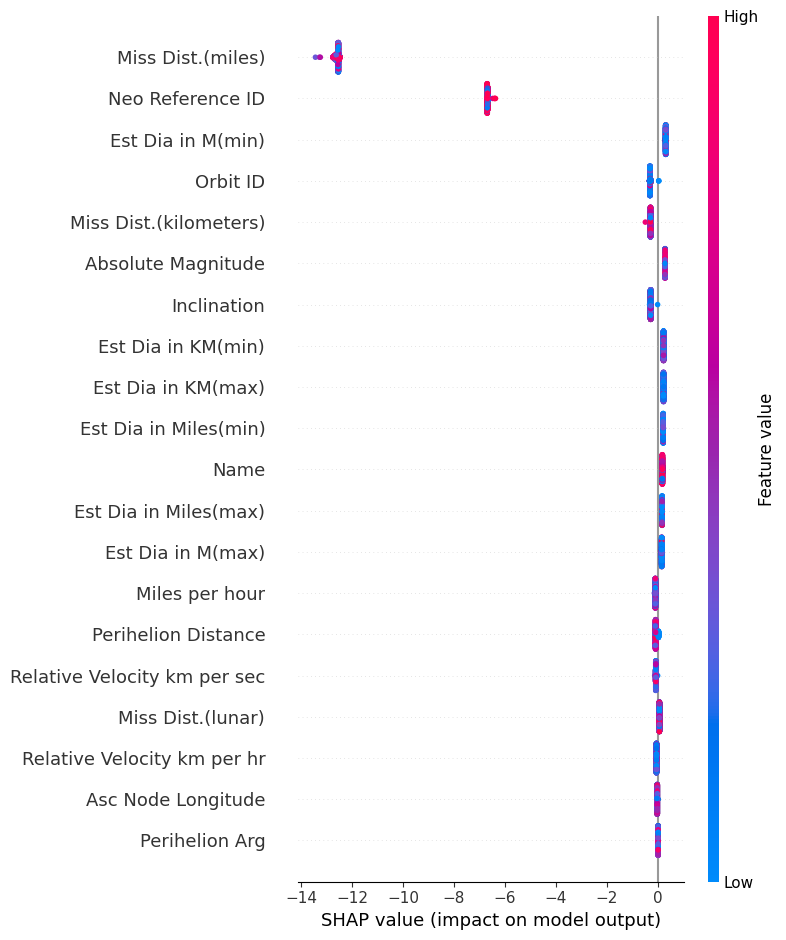

In [18]:
import shap

# Extracting the best estimator from the grid search
best_estimator = grid_search.best_estimator_['classifier']

# Initializing SHAP explainer
explainer = shap.Explainer(best_estimator)

# Explaining the model's predictions
shap_values = explainer.shap_values(X_test_processed)

shap.summary_plot(shap_values, X_test_processed)

# **Neural Network**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Defining the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Generating predictions
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/10
94/94 [==============================] - 4s 19ms/step - loss: 4798859264.0000 - accuracy: 0.6932 - val_loss: 247264096.0000 - val_accuracy: 0.8440
Epoch 2/10
94/94 [==============================] - 1s 13ms/step - loss: 249740864.0000 - accuracy: 0.7739 - val_loss: 0.6570 - val_accuracy: 0.8440
Epoch 3/10
94/94 [==============================] - 1s 13ms/step - loss: 0.6321 - accuracy: 0.8363 - val_loss: 0.6075 - val_accuracy: 0.8440
Epoch 4/10
94/94 [==============================] - 1s 13ms/step - loss: 0.5919 - accuracy: 0.8363 - val_loss: 0.5731 - val_accuracy: 0.8440
Epoch 5/10
94/94 [==============================] - 1s 11ms/step - loss: 0.5642 - accuracy: 0.8363 - val_loss: 0.5470 - val_accuracy: 0.8440
Epoch 6/10
94/94 [==============================] - 1s 13ms/step - loss: 0.5423 - accuracy: 0.8363 - val_loss: 0.5262 - val_accuracy: 0.8440
Epoch 7/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5248 - accuracy: 0.8363 - val_loss: 0.5093 - val_accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


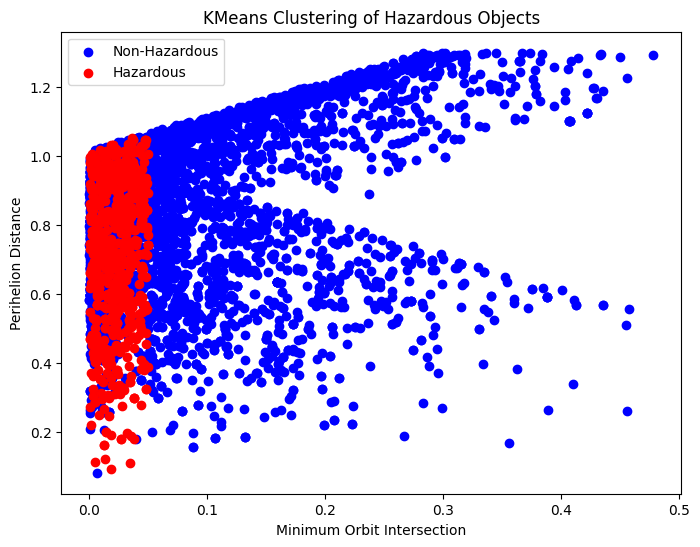

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract selected features and target variable
X_selected = nasa_df[selected_features]
y_hazardous = nasa_df['Hazardous']

# Encode target variable
y_encoded = y_hazardous.astype(int)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_selected)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[y_encoded == 0]['Minimum Orbit Intersection'],
            X_selected[y_encoded == 0]['Perihelion Distance'],
            color='blue', label='Non-Hazardous')
plt.scatter(X_selected[y_encoded == 1]['Minimum Orbit Intersection'],
            X_selected[y_encoded == 1]['Perihelion Distance'],
            color='red', label='Hazardous')
plt.title('KMeans Clustering of Hazardous Objects')
plt.xlabel('Minimum Orbit Intersection')
plt.ylabel('Perihelion Distance')
plt.legend()
plt.show()

# **DB SCAN**

<ipython-input-91-1c8c0ec8522f>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(X_visualize[y_resampled == True]['Inclination'], X_visualize[y_resampled == True]['Minimum Orbit Intersection'],
<ipython-input-91-1c8c0ec8522f>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(X_visualize[y_resampled == True]['Inclination'], X_visualize[y_resampled == True]['Minimum Orbit Intersection'],
<ipython-input-91-1c8c0ec8522f>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(X_visualize[y_resampled == False]['Inclination'], X_visualize[y_resampled == False]['Minimum Orbit Intersection'],
<ipython-input-91-1c8c0ec8522f>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(X_visualize[y_resampled == False]['Inclination'], X_visualize[y_resampled == False]['Minimum Orbit Intersection'],


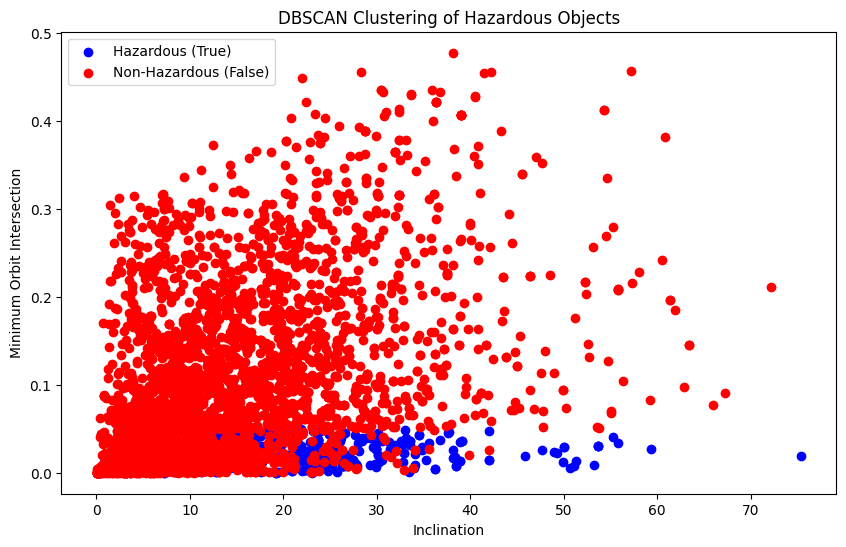

In [91]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Select the features from X_preprocessed_df
X_selected = nasa_df[selected_features]

# Selecting two attributes for visualization
X_visualize = X_selected[['Inclination', 'Minimum Orbit Intersection']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_visualize)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plotting clusters for hazardous (True) objects
plt.scatter(X_visualize[y_resampled == True]['Inclination'], X_visualize[y_resampled == True]['Minimum Orbit Intersection'],
            c='blue', label='Hazardous (True)')

# Plotting clusters for non-hazardous (False) objects
plt.scatter(X_visualize[y_resampled == False]['Inclination'], X_visualize[y_resampled == False]['Minimum Orbit Intersection'],
            c='red', label='Non-Hazardous (False)')

plt.title('DBSCAN Clustering of Hazardous Objects')
plt.xlabel('Inclination')
plt.ylabel('Minimum Orbit Intersection')
plt.legend()
plt.show()

# **Hierarchical Clustering**

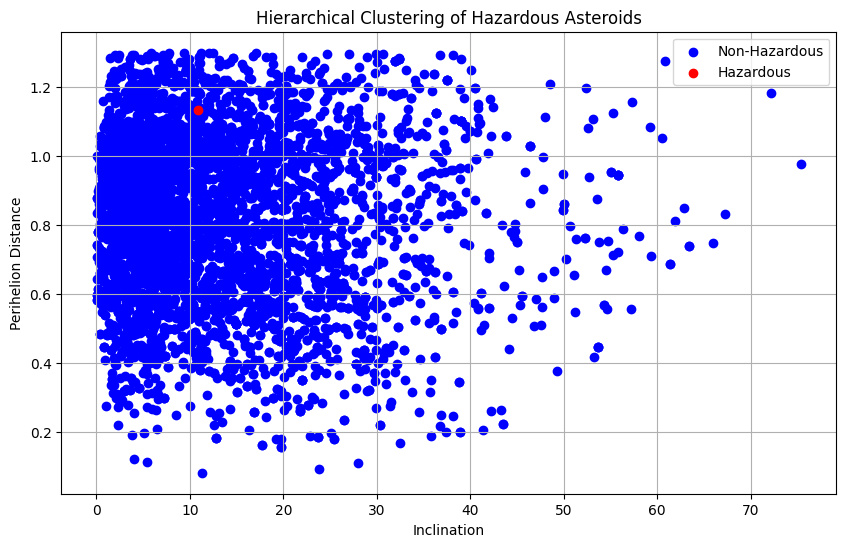

In [100]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Extract selected features and target variable
X_selected = nasa_df[selected_features]
y_hazardous = nasa_df['Hazardous']

# Encode target variable
y_encoded = y_hazardous.astype(int)

# Apply Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = clustering.fit_predict(X_selected)

# Scatter plot
plt.figure(figsize=(10, 6))

# Plot points for each cluster
plt.scatter(X_selected.iloc[cluster_labels == 0]['Inclination'],
            X_selected.iloc[cluster_labels == 0]['Perihelion Distance'],
            c='blue', label='Non-Hazardous')

plt.scatter(X_selected.iloc[cluster_labels == 1]['Inclination'],
            X_selected.iloc[cluster_labels == 1]['Perihelion Distance'],
            c='red', label='Hazardous')

plt.title('Hierarchical Clustering of Hazardous Asteroids')
plt.xlabel('Inclination')
plt.ylabel('Perihelion Distance')
plt.legend()
plt.grid(True)
plt.show()

# **Agglomerative Clustering**

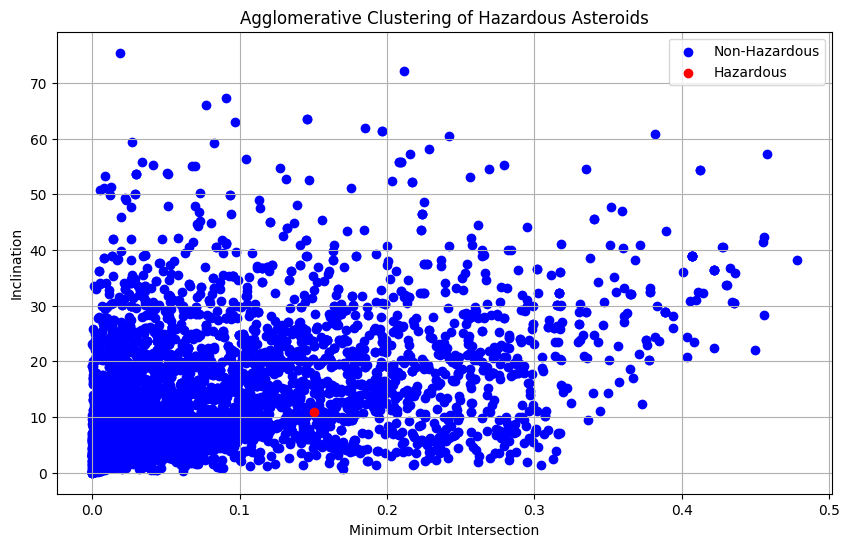

In [103]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Extract selected features and target variable
X_selected = nasa_df[selected_features]
y_hazardous = nasa_df['Hazardous']

# Encode target variable
y_encoded = y_hazardous.astype(int)

# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
cluster_labels = agg_clustering.fit_predict(X_selected)

# Scatter plot
plt.figure(figsize=(10, 6))

# Plot points for each cluster
plt.scatter(X_selected.iloc[cluster_labels == 0]['Minimum Orbit Intersection'],
            X_selected.iloc[cluster_labels == 0]['Inclination'],
            c='blue', label='Non-Hazardous')

plt.scatter(X_selected.iloc[cluster_labels == 1]['Minimum Orbit Intersection'],
            X_selected.iloc[cluster_labels == 1]['Inclination'],
            c='red', label='Hazardous')

plt.title('Agglomerative Clustering of Hazardous Asteroids')
plt.xlabel('Minimum Orbit Intersection')
plt.ylabel('Inclination')
plt.legend()
plt.grid(True)
plt.show()

# **Linear Regression**

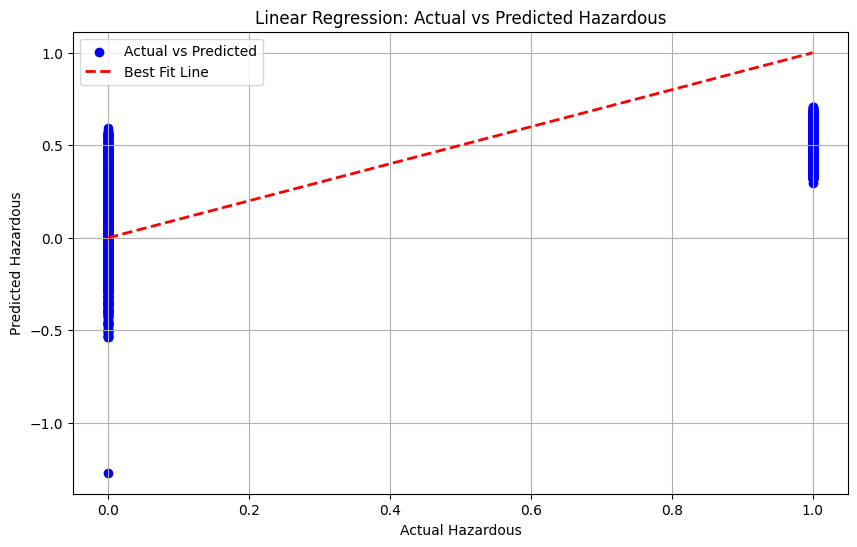

In [104]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract selected features and target variable
X_selected = nasa_df[selected_features]
y_hazardous = nasa_df['Hazardous']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_selected, y_hazardous)

# Predictions
y_pred = model.predict(X_selected)

# Scatter plot with best fit line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(y_hazardous, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the best fit line
plt.plot([y_hazardous.min(), y_hazardous.max()], [y_hazardous.min(), y_hazardous.max()], color='red', linestyle='--', linewidth=2, label='Best Fit Line')

plt.title('Linear Regression: Actual vs Predicted Hazardous')
plt.xlabel('Actual Hazardous')
plt.ylabel('Predicted Hazardous')
plt.legend()
plt.grid(True)
plt.show()